<a href="https://colab.research.google.com/github/jdariasl/ML_2020/blob/master/Labs/lab1/lab1_parte1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.


In [ ]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
#for local
#import sys ; sys.path.append('../commons/utils/')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py
from general import configure_lab1_p1
configure_lab1_p1()
from lab1 import *
GRADER_LAB_1_P1, db, x, y = part_1()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
--2020-09-11 12:36:22--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10582 (10K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  10.33K  --.-KB/s    in 0s      

2020-09-11 12:36:22 (74.9 MB/s) - ‘general.py’ saved [10582/10582]

lab configuration started
installing libraries
downloading files
lab configured
cargando librerias y variables al ambiente


# Laboratorio 1 - Parte 1

**Regresión polinomial múltiple**


## Ejercicio 1: Contextualización del problema

El problema de regresión que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality).

In [ ]:
# tienes ya cargadas las siguientes variables:
print("conjunto de datos", x)
print("variable a predecir", y)


conjunto de datos [[   2.6 1360.   150.  ... 1268.    13.6   48.9]
 [   2.  1292.   112.  ...  972.    13.3   47.7]
 [   2.2 1402.    88.  ... 1074.    11.9   54. ]
 ...
 [   2.4 1142.  -200.  ... 1092.    26.9   18.3]
 [   2.1 1003.  -200.  ...  770.    28.3   13.5]
 [   2.2 1071.  -200.  ...  816.    28.5   13.1]]
variable a predecir [0.7578 0.7255 0.7502 ... 0.6406 0.5139 0.5028]


In [ ]:
#Ejercicio de Codigo
def num_muestras_carac(X):
    """Esta funcion es encargada retornar el numero de muestras
        y caracteristicas del conjunto de datos X

        X: matriz numpy
        retorna:
            numero de muestras (int/float)
            numero de caracteristicas (int/float)
    """
    
    return np.shape(X)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio1", num_muestras_carac)

TEST EXITOSO!


In [ ]:
#@title Pregunta Abierta
#@markdown  ¿que tipo de problema vamos a resolver? justifique su respuesta 
respuesta_1 = "Problema de regresion porque se esta trabajando con un conjunto de datos continuo. \"" #@param {type:"string"}

## Ejercicio 2

Analice los siguientes métodos de la teoría  de modelos de  *regresión polinomial múltiple*:

1. error cuadrático medio (<font color='blue'>ECM</font>), 
2. modelo de regresión múltiple (<font color='blue'>regression</font>)
3. potencia del polinomio (<font color='blue'>potenciaPolinomio</font>)
4. gradiente descendente.

Para los tres primeros métodos, su implementación en código es dentro del notebook. Por ejemplo la siguiente celda contiene la implementación del ECM y de la regression. Comprenda su funcionamiento y ejecute la celda para definir las funciones y poder usarlas.


In [ ]:
def ECM(Y_est,Y):
    """funcion para calcular el error cuadratico medio
    Y_est: debe contener los valores predichos por el modelo evaluar
    Y: debe contener los valores reales
    retorna: error cuadratico medio
    """
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(N)
    return ecm 

def regression(X, W):
    """calcula la regresión multiple
    X: los valores que corresponden a las caractersiticas
    W: son los pesos usadados para realizar la regresión
    retorna: valor estimado
    """    
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)


De igual manera, debemos extender nuestro conjunto de datos. Comprende que hace  la siguiente celda de código y ejecutala. **Muy importante ejecutar SOLA UNA vez.**

In [ ]:
#Aca llamamos la funcion creada anteriormente
# par obtener el numero muestras y caractersiticas
muestras,caracterisitcas = num_muestras_carac(x)
#Extendemos la matriz de X para el parámetro independiente
unos = np.array([np.ones(muestras)])
x = np.concatenate((unos.T, x), axis=1)
x = x.reshape(muestras, caracterisitcas+1)
y = y.reshape(np.size(y), 1)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿por es necesario realizar la anterior extensión a nuestro conjunto de datos?
respuesta_2 = "Para poder realizar el producto punto entre X (conjunto de datos de entrada) y  W (pesos), ya que W contiene el termino independiente. " #@param {type:"string"}

Ahora vamos a completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

recordar que 

$$ \frac{\partial E(w)}{\partial w_j} = \frac{\partial E({\bf{w}})}{\partial w_j} = \frac{1}{N}\sum_{i=1}^{N}\left( f({\bf{x}}_i,{\bf{w}}) - y_i\right) \frac{\partial }{\partial w_j} f({\bf{x}}_i, {\bf{w}})$$

recuerda que debe usar las funciones ya implementadas y no usar **ninguna otra libreria**, adicional a las librerias ya pre-cargadas como numpy (la puedes llamar con np.)

In [ ]:
## Ejercicio de codigo
def gradiente_descendente(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje

    retorna: W el valor de de los parametros de regresión polinomica
    """
      
    #Inicializamos el vector de parámetros con ceros y suamos la función
    # para saber el numero de muestras y caractersiticas
    N, caracterisitcas = num_muestras_carac(X)
    W = np.zeros((1,caracterisitcas))
    W = W.reshape(np.size(W), 1)    

    for iter in range(iteraciones):
        ## Aca debes completar la funcion! recuerda que solo debes usar numpy (np.funcion_a_usar)
        ## para actualizar los pesos W.
        ## Pista: consulta que efecto tienen los parametros keepdims y axis en np.sum()
        a = regression(X,W) - Y.reshape(N,1)
        b = a*X
        sum = np.sum(b,axis=0,keepdims=True)/N
        W = W - (eta*sum.T)
    return W

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio2", gradiente_descendente)

TEST EXITOSO!


## Ejercicio 3: Entrenamiento

Con la función implementada vamos a entrenar un modelo y calcular su error de entrenamiento. Antes de realizar esto, debemos separar nuestro conjunto de datos.



In [ ]:
# esto para lograr reproductibilidad
# de nuestro modelo
random.seed(1)
# usamos nuestra funcion para obtener el numero de muestras
N, _ = num_muestras_carac(x)
ind=np.random.permutation(N)
Xtrain = x[ind[0:int(math.ceil(0.7*N))],:]
Xtest = x[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = y[ind[0:int(math.ceil(0.7*N))]]
Ytest = y[ind[int(math.ceil(0.7*N)):N]]

Ahora entrena ejecutando la siguiente linea de codigo

In [ ]:
W = gradiente_descendente(Xtrain, Ytrain, eta = 0.0001, iteraciones=5)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿por qué fue necesario dividir nuestro conjunto de datos? justifique su respuesta 
respuesta_3 = "Para poder tener un conjunto de datos que sean nuevos para el modelo y asi evaluar el modelo con datos que no intervinieron en su entrenamiento" #@param {type:"string"}

Vamos a evaluar nuestro modelo calculando el error cuadrático medio. Para ello vamos crear a una función. Recuerda usar las funciones definidas anteriormente.

In [ ]:
## Ejercicio de Código
def evaluar_modelo (W, X_to_test, Y_True):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo

    retorna: el error cuadratico medio
    """
    Y_est=regression(X_to_test,W)
    error= ECM(Y_est,Y_True)
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas

    return(error)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio3", evaluar_modelo)

TEST EXITOSO!


In [ ]:
# y ahora usala para calcular el error, para evaluar el modelo
error_train = evaluar_modelo(W, X_to_test = Xtrain,  Y_True = Ytrain)
print("error en entrenamiento del modelo", error_train)
error_test = evaluar_modelo(W, X_to_test = Xtest,  Y_True = Ytest)
print("error en la evaluación del modelo", error_test)

error en entrenamiento del modelo 3.057257758553903e+28
error en la evaluación del modelo 3.061920169650378e+28


In [ ]:
#@title Pregunta Abierta
#@markdown ¿que conjunto de datos se uso para evaluar el modelo (cual fue el conjunto de datos asignado a X_to_test para el error test)? justifica tu respuesta
respuesta_4 = "El conjunto de datos que se utiliza para evaluar el modelo es Xtest porque es el conjunto de datos que no ha intervenido en el entrenamiento del modelo, por lo cual es el indicado para evaluar el modelo." #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  escribe aqui tu error al evaluar el modelo con tres cifras decimales. ¿Que tan bueno es tu modelo? Justifica tu respuesta.
respuesta_5 = "3.181 el modelo no se ajusta bien ya que el ECM esta muy alejado del valor de cero. " #@param {type:"string"}


Hasta ahora lo que hemos realizado es un regresión lineal no polinómica. Nuestro siguiente objetivo es tomar esta regresión y transformarla en polinómica. Comprenda el funcionamiento de la función propuesta

In [ ]:
#Potencia de polinomio
def potenciaPolinomio(X,grado):
    """calcula la potencia del polinomio
    X: los valores que corresponden a las caractersiticas
    grado: el grado para realizar la potencia al polinomio
    retorna: el valor de X despues elevarlo al grado del polinimoo indicado
    """
    X2 = X.copy()
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    
    return X2

ahora debemos usar esta función para completar la siguiente, recuerda que puedes reusar funciones desarrolladas anteriomente

In [ ]:
## Ejercicio de codigo
def gradiente_descendente_poly (X, Y, eta, iteraciones, grado):
    """Gradiente descendente para regresión lineal múltiple
    X: Matriz de datos extendida
    Y: vector con los valores a predecir
    W: Vector de parámetros del modelo
    eta: Taza de aprendizaje
    iteraciones: numero de iteraciones maximo para el gradiente
    grado: el valor del polinomio a usar
    retorna: W el valor de de los parametros de regresión polinomica
    """
    X2 = potenciaPolinomio(X,grado)
    ## completa el codigo
    W = gradiente_descendente(X2,Y,eta,iteraciones)
    return (W)

def evaluar_modelo_poly (W, X_to_test, Y_True, grado):
    """ funcion que evalua un modelo de regresión usando el error cuadratico medio

    W: es un matriz con los parametros del modelo entrenados
    X_to_test: conjunto de datos para usar en el evaluamiento del modelo
    Y_True: valores reales para usar en el evaluamiento del modelo
    grado: grado del polinimio a usar

    retorna: el error cuadratico medio
    """
    ## Comienza a completar tu codigo. recuerda usar la funciones ya definidas
    X2 = potenciaPolinomio(X_to_test,grado)
    Y_est=regression(X2,W)
    error=ECM(Y_est,Y_True)
    
    return(error)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio4", gradiente_descendente_poly)
GRADER_LAB_1_P1.run_test("ejercicio5", evaluar_modelo_poly)

TEST EXITOSO!
TEST EXITOSO!


In [ ]:
# entrenamos
W = gradiente_descendente_poly(Xtrain, Ytrain, eta = 0.0001, iteraciones=2, grado = 2)

In [ ]:
# completa los parametros para evaluar el modelo
error_test = evaluar_modelo_poly(W, X_to_test = Xtest,  Y_True = Ytest, grado = 2)
print("error en la evaluación del modelo", error_test)

error en la evaluación del modelo 8.181829783543625e+35


## Ejercicio 4: Experimentar

En nuestro primer experimento vamos a evaluar el rendimiento del modelo usando varias tasas de aprendizaje y grados de polinimios. Vamos a dejar por ahora un numero de iteraciones fijas = 5. Para ello completa la siguiente función.



In [ ]:
## ejercicio de codigo
def experimentar (Xtrain, Xtest, Ytrain, Ytest, tasas, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    grados: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    numero_iter = 5

    resultados = pd.DataFrame()
    idx = 0 # indice
    for eta in tasas:
        for grado in grados:

            W = gradiente_descendente_poly(Xtrain,Ytrain,eta,numero_iter,grado)
            error = evaluar_modelo_poly(W,Xtest,Ytest,grado)
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'tasa de aprendizaje'] = eta
            resultados.loc[idx,'ecm'] = error
            idx = idx+1

    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio6", experimentar)

TEST EXITOSO!


In [ ]:
## Ahora usa para verlos los resultados
tasas_aprendizaje = [1e-6, 1e-5, 1e-3, 1e-2]
grados_polinomio = [1,2,3]
resultados_ex1 = experimentar(Xtrain, Xtest, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)

In [ ]:
#para ver los resultados
resultados_ex1

,grado,tasa de aprendizaje,ecm
0,1.0,0.000001,5.015138e+07
1,2.0,0.000001,1.305423e+70
2,3.0,0.000001,2.055213e+134
3,1.0,0.000010,2.631217e+18
4,2.0,0.000010,1.305424e+80
5,3.0,0.000010,2.055213e+144
6,1.0,0.001000,3.108301e+38
7,2.0,0.001000,1.305424e+100
8,3.0,0.001000,2.055213e+164
9,1.0,0.010000,3.112973e+48


Si has implementado todo correctamente, parecieria que nuestros entrenamientos no esta logrando buenos resultados (hasta parece haber errores infinitos! o no determinados!). Ahora Entiende la siguiente función. 


In [ ]:
#Normalizamos los datos
def normalizar(Xtrain, Xtest):
    """ función que se usa para normalizar los datos con
    un metodo especifico
    Xtrain: matriz de datos entrenamiento a normalizar
    Xtest: matriz de datos evaluación a normalizar
    retorna: matrices normalizadas
    """
    
    media = np.mean(Xtrain, axis = 0)
    desvia = np.std(Xtrain, axis = 0)
    Xtrain_n = stats.stats.zscore(Xtrain)
    Xtest_n = (Xtest - media )/desvia
    # si hay una desviacion por cero, reemplazamos los nan
    Xtrain_n = np.nan_to_num(Xtrain_n)
    Xtest_n = np.nan_to_num(Xtest_n)
    return (Xtrain_n, Xtest_n)

Ahora vuelve a realizar los mismos experimentos pero esta vez usa los valores de salida de la función anterior.

In [ ]:
Xtrain_n, Xtest_n = normalizar(Xtrain, Xtest)

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [ ]:
resultados_ex2 = experimentar(Xtrain_n, Xtest_n, Ytrain, Ytest, tasas_aprendizaje, grados_polinomio)
#para ver los resultados
resultados_ex2

,grado,tasa de aprendizaje,ecm
0,1.0,0.000001,1.654101e+03
1,2.0,0.000001,1.652671e+03
2,3.0,0.000001,1.623367e+03
3,1.0,0.000010,1.653387e+03
4,2.0,0.000010,1.639152e+03
5,3.0,0.000010,1.368454e+03
6,1.0,0.001000,1.576814e+03
7,2.0,0.001000,6.418024e+02
8,3.0,0.001000,4.651112e+02
9,1.0,0.010000,1.028833e+03


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


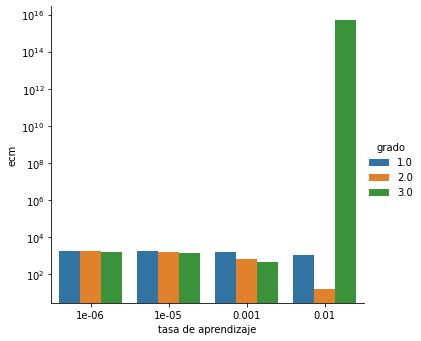

In [ ]:
# ejecuta esta linea de codigo para ver graficamos tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
s = sns.catplot(data = resultados_ex2, x = 'tasa de aprendizaje',
            y = 'ecm',hue ='grado', kind = 'bar', )
s.set(yscale="log")

Ten en cuenta el resutaldo de los  dos experimentos y  responde la  siguiente pregunta abierta

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Qué proceso hace la normalización sobre los datos? Consulte por qué es necesaria la normalización en el modelo de regresión y cuáles son los tipos de normalización más comunes. ¿Cuál de ellos se aplicó en el laboratorio?
respuesta_5 = "\"La normalizacion sobre los datos lo que hace es que los datos que se miden en escalas diferentes, sean ajustados en una escala comun. La normalizacion es necesaria  porque permite realizar comparaciones entre datos medidos en escalas diferentes y que aparentemente son muy dispares, pero tienen relacion en la informacion que estemos analizando.  Los tipos de normalizacion mas comunes son: Desviacion Estandar, T de student, Residuo estudentizado, y Coeficiente de Variacion.  El metodo utilizado en el laboratorio para normalizar los datos fue la Desviacion Estandar, la cual se logra con la funcion np.std().\"" #@param {type:"string"}

Finalmente, en nuestro tercer experimento, vamos ver el efecto de las iteraciones sobre el error. completa la siguiente función. Esta vez la tasa de aprendizaje es constante

In [ ]:
## ejercicio de codigo
def experimentar_2 (Xtrain, Xtest, Ytrain, Ytest, iteraciones, grados):
    """ funcion para realizar experimentos.
    Xtrain: conjunto de datos
    Xtest:
    Ytrain:
    Ytest:
    tasas: Es una lista con los valores númericos de tasas de aprendizaje 
        para realizar los experimentos
    rangos: Es una lista con los valores númericos de grados 
        para realizar los experimentos
    retorna: un dataframe con el resultados de los experimentos
    """
    eta = 1e-2
    resultados = pd.DataFrame()
    idx = 0 # indice
    for iter in iteraciones:
        for grado in grados:
            W = gradiente_descendente_poly(Xtrain,Ytrain,eta,iter,grado)
            error = evaluar_modelo_poly(W,Xtest,Ytest,grado)
        
            resultados.loc[idx,'iteraciones'] = iter
            resultados.loc[idx,'grado'] = grado
            resultados.loc[idx,'ecm'] = error
            idx = idx+1
    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
GRADER_LAB_1_P1.run_test("ejercicio7", experimentar_2)

TEST EXITOSO!


In [ ]:
num_iters = [1,5,10,20,50, 100,200]
grados_polinomio = [1,2]
# usamos la funcion para evaliar los resultados
resultados_ex3 = experimentar_2(Xtrain_n, Xtest_n, Ytrain, Ytest, num_iters, grados_polinomio )

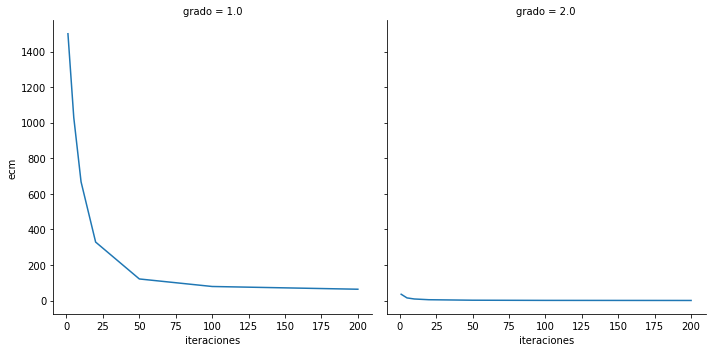

In [ ]:
# ejecuta esta linea de codigo para ver raficamente tus resultados
# aca usamos una libreria llamada seaborn
import seaborn as sns
sns.relplot(data = resultados_ex3, x = 'iteraciones',
            y = 'ecm',col ='grado', kind = 'line')

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿con base a los resultados anteriores, qué efecto tiene el numero de iteraciones en el error?
respuesta_6 = "\"grado=1: se evidencia que a mayor numero de iteracciones menor es el ECM a diferencia del grado 2 donde tiende a permanecer constante el ECM a pesar el n\\xFAmero de iteracciones.\"" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿que efecto tiene el grado del polinomio en el ECM?
respuesta_7 = "Dependiendo del grado el ECM se mantiene estable. " #@param {type:"string"}

In [ ]:
GRADER_LAB_1_P1.check_tests()

Todo se ve ok. Asegurate de responder las preguntas abiertas y envia e archivo al formulario ¡buen trabajo!


In [ ]:
#@title Integrantes
codigo_integrante_1 ='1017251689' #@param {type:"string"}
codigo_integrante_2 = '1036654402'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo del los profesores


In [ ]:
GRADER_LAB_1_P1.grade()